Have you see the movie "The Mitchells vs The Machines"?  The dog Monchi is a pug and confuses the robots.  They struggle to determine if he is a dog, pig, or loaf of bread.

Lets put it to the test!  Cause yes, that's what a middle-aged child would do :lol:

In [153]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")


In [154]:
!pip install -Uqq fastai duckduckgo_search

In [155]:
from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

Searching for 'pug dog photos'


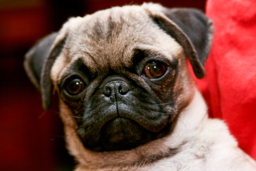

In [156]:
from fastdownload import download_url
urls = search_images('pug dog photos', max_images=1)

dest = 'pug.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"adult pug face only no body" photos'


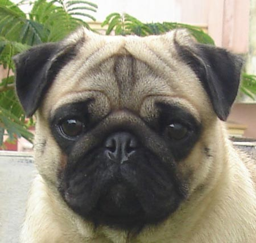

In [157]:
from fastdownload import download_url
urls = search_images('"adult pug face only no body" photos', max_images=1)

dest = 'pug-face.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"pug dog full body" photos'


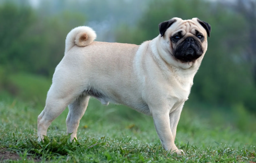

In [158]:
from fastdownload import download_url
urls = search_images('"pug dog full body" photos', max_images=1)

dest = 'pug-full.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"sun dog" photos'


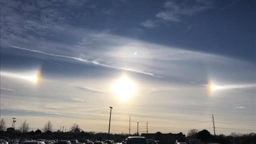

In [159]:
from fastdownload import download_url
urls = search_images('"sun dog" photos', max_images=5)

dest = 'sun-dog.jpg'
download_url(urls[4], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"pig" photos'


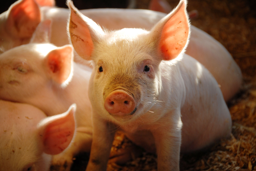

In [160]:
from fastdownload import download_url
urls = search_images('"pig" photos', max_images=1)

dest = 'pig.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"loaf of bread" photos'


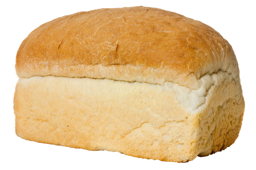

In [178]:
from fastdownload import download_url
urls = search_images('"loaf of bread" photos', max_images=1)

dest = 'loaf of bread.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [164]:
searches = ['dog','pig','loaf of bread']
path = Path('training_data/mvm')
from time import sleep

max_images=30

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'"{o}" photo', max_images))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'"{o} in sun" photo', max_images))
    sleep(10)
    download_images(dest, urls=search_images(f'"{o} in shade" photo', max_images))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for '"dog" photo'
Searching for '"dog in sun" photo'
Searching for '"dog in shade" photo'
Searching for '"pig" photo'
Searching for '"pig in sun" photo'
Searching for '"pig in shade" photo'
Searching for '"loaf of bread" photo'
Searching for '"loaf of bread in sun" photo'
Searching for '"loaf of bread in shade" photo'


In [165]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

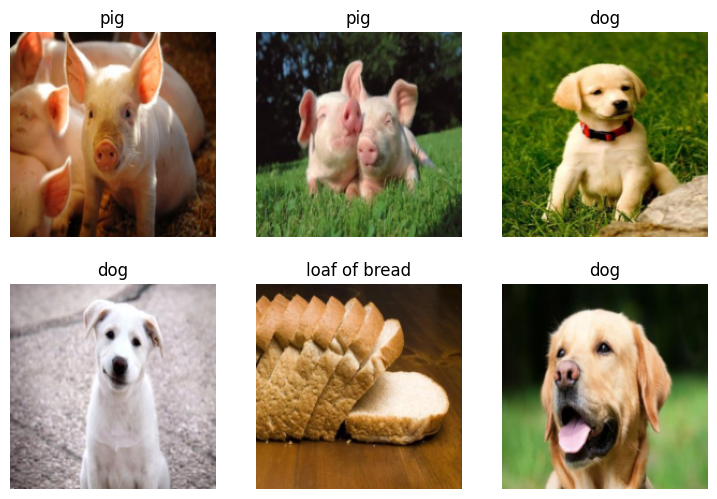

In [170]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [171]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.466792,0.225222,0.100000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.277899,0.123959,0.080000,00:08
1,0.188411,0.059264,0.020000,00:08
2,0.138643,0.032304,0.020000,00:08


This is a: loaf of bread (1).
Probability it's a loaf of bread: 0.5770


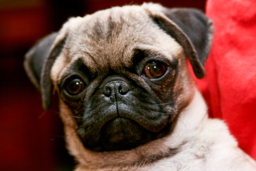

In [172]:
dest='pug.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: dog (0).
Probability it's a dog: 0.7470


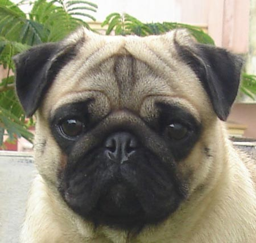

In [173]:
dest='pug-face.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: dog (0).
Probability it's a dog: 0.9579


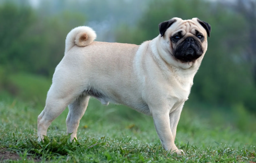

In [174]:
dest='pug-full.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: dog (0).
Probability it's a dog: 0.6427


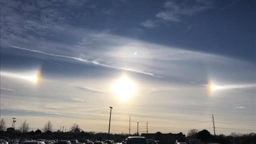

In [175]:
dest='sun-dog.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: loaf of bread (1).
Probability it's a loaf of bread: 1.0000


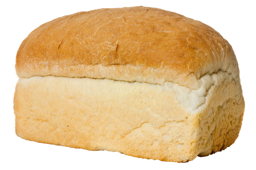

In [179]:
dest='loaf of bread.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: pig (2).
Probability it's a pig: 0.9994


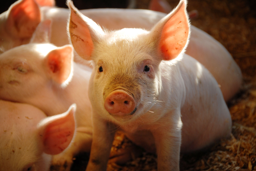

In [180]:
dest='pig.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

It's accurate enough it seems.  But if needed, can train with more epochs and/or more image data.

**NOTE**: if 'sun dog' is not a known category, it will be a hit for dog images.  I guess there's some 'sun dog' data getting into the data?

# Revision: sun dog
Add category for 'sun dog' and retrain the model.

In [181]:
# larger data set.. does it get better? (answer:yes)
o='sun dog'
dest = (path/o)
dest.mkdir(exist_ok=True, parents=True)
download_images(dest, urls=search_images(f'"{o}" photo', max_images*3)) # do not get 'sun' and 'shade' variants
sleep(10)  # Pause between searches to avoid over-loading server
resize_images(path/o, max_size=400, dest=path/o)

Searching for '"sun dog" photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [182]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.100838,0.195588,0.100000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.314570,0.055110,0.020000,00:08
1,0.186981,0.064323,0.020000,00:08
2,0.131901,0.067112,0.020000,00:08


This is a: pig (2).
Probability it's a pig: 0.7142


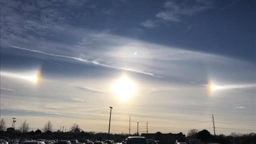

In [183]:
dest='sun-dog.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

# Revision: train more!

In [184]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.639812,0.253418,0.080000,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.251201,0.165717,0.040000,00:08
1,0.190811,0.072509,0.020000,00:08
2,0.159809,0.064339,0.020000,00:08
3,0.123704,0.078428,0.020000,00:08
4,0.096000,0.079601,0.040000,00:08
5,0.075531,0.072987,0.040000,00:08
6,0.062239,0.058037,0.040000,00:08
7,0.057251,0.046941,0.040000,00:08
8,0.048383,0.045391,0.020000,00:08
9,0.041824,0.046466,0.020000,00:08


This is a: dog (0).
Probability it's a dog: 0.9979


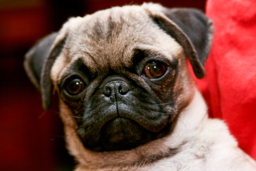

In [185]:
dest='pug.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

This is a: pig (2).
Probability it's a pig: 0.5717


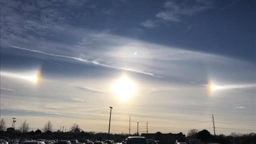

In [186]:
dest='sun-dog.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

# Revision: more data!!

In [188]:
# only more data for dog, pig, and loaf of bread
searches = ['dog','pig','loaf of bread']

max_images = max_images * 3

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'"{o}" photo', max_images))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'"{o} in sun" photo', max_images))
    sleep(10)
    download_images(dest, urls=search_images(f'"{o} in shade" photo', max_images))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for '"dog" photo'
Searching for '"dog in sun" photo'
Searching for '"dog in shade" photo'


/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for '"pig" photo'
Searching for '"pig in sun" photo'
Searching for '"pig in shade" photo'


/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparen

Searching for '"loaf of bread" photo'
Searching for '"loaf of bread in sun" photo'
Searching for '"loaf of bread in shade" photo'


/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/app-root/lib64/python3.9/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/opt/app-root/lib64/py

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [189]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [ ]:
dest='sun-dog.jpg'
category,category_num,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)